# Read in throughput corrected SV1 sky surface brightnesses for bright time exposures

In [1]:
!pip install git+https://github.com/desi-bgs/bgs-cmxsv.git --upgrade --user

  Cloning https://github.com/desi-bgs/bgs-cmxsv.git to /tmp/pip-req-build-l_fkn6s_
  Running command git clone -q https://github.com/desi-bgs/bgs-cmxsv.git /tmp/pip-req-build-l_fkn6s_
  Created wheel for bgs-sv: filename=bgs_sv-0.0-py3-none-any.whl size=85054 sha256=a57ac62e3d70b883b58871ecd72b858f145242da217e4a1cb276c2c3526ed1d0
  Stored in directory: /tmp/pip-ephem-wheel-cache-8zpxvib_/wheels/c5/7b/33/3fa8f7338087a37e7ad7a1378e08d97458e5dbab577a10268f
Successfully built bgs-sv
  Attempting uninstall: bgs-sv
    Found existing installation: bgs-sv 0.0
    Uninstalling bgs-sv-0.0:
      Successfully uninstalled bgs-sv-0.0


In [2]:
from bgs_sv import sv1

In [3]:
bright_exps = sv1.sv1_bright_exposures()

In [4]:
bright_exps

NIGHT,EXPID,TILEID,TILERA,TILEDEC,EXPTIME,MJDOBS,FIELD,TARGETS,EBV,SPECMODEL_SKY_RMAG_AB,NGFA,B_DEPTH,R_DEPTH,Z_DEPTH,TGT,SKY,STD,WD,LRG,ELG,QSO,BGS,MWS,GFA_AIRMASS_MIN,GFA_AIRMASS_MEAN,GFA_AIRMASS_MED,GFA_AIRMASS_MAX,GFA_MOON_ILLUMINATION_MIN,GFA_MOON_ILLUMINATION_MEAN,GFA_MOON_ILLUMINATION_MED,GFA_MOON_ILLUMINATION_MAX,GFA_MOON_ZD_DEG_MIN,GFA_MOON_ZD_DEG_MEAN,GFA_MOON_ZD_DEG_MED,GFA_MOON_ZD_DEG_MAX,GFA_MOON_SEP_DEG_MIN,GFA_MOON_SEP_DEG_MEAN,GFA_MOON_SEP_DEG_MED,GFA_MOON_SEP_DEG_MAX,GFA_TRANSPARENCY_MIN,GFA_TRANSPARENCY_MEAN,GFA_TRANSPARENCY_MED,GFA_TRANSPARENCY_MAX,GFA_FWHM_ASEC_MIN,GFA_FWHM_ASEC_MEAN,GFA_FWHM_ASEC_MED,GFA_FWHM_ASEC_MAX,GFA_SKY_MAG_AB_MIN,GFA_SKY_MAG_AB_MEAN,GFA_SKY_MAG_AB_MED,GFA_SKY_MAG_AB_MAX,GFA_FIBER_FRACFLUX_MIN,GFA_FIBER_FRACFLUX_MEAN,GFA_FIBER_FRACFLUX_MED,GFA_FIBER_FRACFLUX_MAX,GFA_FIBER_FRACFLUX_ELG_MIN,GFA_FIBER_FRACFLUX_ELG_MEAN,GFA_FIBER_FRACFLUX_ELG_MED,GFA_FIBER_FRACFLUX_ELG_MAX,GFA_TRANSPFRAC_MIN,GFA_TRANSPFRAC_MEAN,GFA_TRANSPFRAC_MED,GFA_TRANSPFRAC_MAX
int64,int64,int64,float32,float32,float32,float32,bytes22,bytes8,float32,float32,int64,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
20201214,67733,80606,36.448,-4.501,900.026,59198.246,XMM-LSS,ELG,0.03,21.359089,103,128.2,119.3,134.4,4198,800,136,10,8,4060,201,10,131,1.3752754,1.4031851,1.4027501,1.4317049,0.0045783324,0.00467682,0.004676891,0.0047707567,152.5133,154.36719,154.37445,156.11397,118.24187,118.246666,118.246704,118.2469,0.88390404,0.95802605,0.9600095,1.0064566,1.7277094,2.1460464,2.1429038,2.8421905,20.282217,19.704794,19.595263,19.500408,0.1346536,0.21910802,0.21554677,0.29692516,0.12175718,0.18617526,0.18442598,0.24084893,0.12755665,0.21041085,0.20650734,0.28864324
20201215,67987,80605,36.448,-4.601,900.1,59199.234,XMM-LSS,QSO+LRG,0.03,21.477333,124,245.8,210.5,203.5,4200,800,136,13,2117,1341,1428,464,191,1.3471851,1.3712026,1.3707378,1.3958737,0.03323932,0.03349334,0.033493184,0.033734582,137.03777,138.91452,138.91463,140.6926,104.55301,104.55864,104.55868,104.55896,0.9220044,0.9873795,0.9878675,1.0301837,1.3727205,1.8906603,1.8462884,2.69004,19.861656,19.723244,19.766836,19.34937,0.1481973,0.27097872,0.26656076,0.40444532,0.13310023,0.22233517,0.22091499,0.31303853,0.14329138,0.26873848,0.26147586,0.4075628
20201215,68042,80610,150.12,2.306,900.067,59199.457,COSMOS,ELG,0.02,21.278013,105,498.6,392.8,364.7,4199,800,146,4,7,4053,231,7,145,1.1590309,1.1652042,1.1650262,1.1726819,0.04304638,0.04332787,0.043323986,0.04360309,150.3027,152.09682,152.12305,153.92958,135.08669,135.08682,135.08676,135.09357,0.95293653,0.97220665,0.9715586,0.9933511,1.2026708,1.3229274,1.3196478,1.4725726,20.380096,20.071424,20.062325,20.021667,0.3671148,0.41821644,0.42034432,0.46070847,0.28865048,0.32072818,0.32162127,0.34879372,0.35787964,0.4065736,0.40866235,0.45239756
20201220,69033,80611,35.22,30.3,300.096,59204.17,Triangulum,BGS+MWS,0.09,21.149273,44,101.9,166.2,250.6,4198,800,212,9,617,24,21,3219,929,1.0032384,1.0044376,1.004396,1.0056597,0.42236385,0.42261845,0.42261595,0.42285162,60.53122,61.203667,61.196228,61.82299,54.829136,54.831467,54.831516,54.831604,0.93572706,0.97163385,0.9732921,0.9877346,1.034615,1.2190686,1.1901006,1.801181,20.147573,19.949478,19.94739,19.890263,0.27715826,0.47230932,0.48140192,0.55708456,0.2267359,0.35436425,0.36086228,0.4063635,0.25934446,0.45932323,0.46880674,0.5453652
20201220,69035,80611,35.22,30.3,300.09,59204.184,Triangulum,BGS+MWS,0.09,21.197042,43,106.3,177.5,271.2,4198,800,212,9,617,24,21,3219,929,1.0117154,1.0140195,1.013973,1.0162535,0.42370406,0.4239595,0.42395782,0.42419285,63.967255,64.66931,64.664,65.31356,54.6697,54.673016,54.673096,54.673203,0.95217896,

(0.0, 10.0)

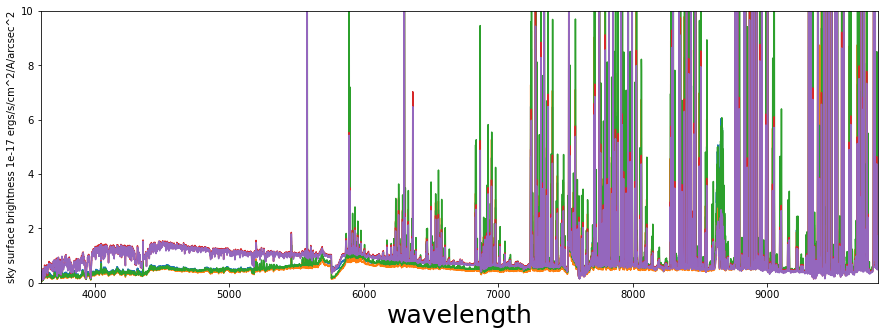

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
for i in range(len(bright_exps))[:5]: 
    w, Isky = sv1.get_obs_sky(bright_exps[i]['NIGHT'], bright_exps[i]['EXPID'], bright_exps[i]['EXPTIME'], 'model', redux="daily")
    sub.plot(w, Isky * 1e17)
sub.set_xlabel('wavelength', fontsize=25)
sub.set_xlim(w.min(), w.max())
sub.set_ylabel('sky surface brightness 1e-17 ergs/s/cm^2/A/arcsec^2')
sub.set_ylim(0, 10)